#DengAI : Predicting disease spread 🦟

Dengue fever is a mosquito-borne disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash, and muscle and joint pain. In severe cases, dengue fever can cause severe bleeding, low blood pressure, and even death.

Because it is carried by mosquitoes, the transmission dynamics of dengue are related to climate variables such as temperature and precipitation. Although the relationship to climate is complex, a growing number of scientists argue that climate change is likely to produce distributional shifts that will have significant public health implications worldwide.

In this project, we will try to build an efficient machine learning model to predict the number of dengue cases each week (in each location) based on environmental variables describing changes in temperature, precipitation, vegetation, and more. Since we're trying to predict a number, the problem is hense a regression one, and we will tackle it by dividing this project to these following steps :

1. Data
2. Evaluation metric
3. Features
4. EDA
5. Modeling
6. Hyperparameter tuning
7. Experimenting

##1. Data

This data was downloaded from DrivenData's DengAI competition at : https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/, it's basically environmental data collected by various U.S. Federal Government agencies—from the Centers for Disease Control and Prevention to the National Oceanic and Atmospheric Administration in the U.S. Department of Commerce.


##2. Evaluation metric

The metric we will be using for this project is MAE (Mean Absolute Error) but as always for better evaluation, we will use other metrics as well.

##3. Features

**city – City abbreviations :**

* sj for San Juan and iq for Iquitos

* week_start_date – Date given in yyyy-mm-dd format

**NOAA's GHCN daily climate data weather station measurements :**

* station_max_temp_c – Maximum temperature

* station_min_temp_c – Minimum temperature

* station_avg_temp_c – Average temperature

* station_precip_mm – Total precipitation

* station_diur_temp_rng_c – Diurnal temperature range

**PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)**
* precipitation_amt_mm – Total precipitation

**NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)**
* reanalysis_sat_precip_amt_mm – Total precipitation
* reanalysis_dew_point_temp_k – Mean dew point temperature
* reanalysis_air_temp_k – Mean air temperature
* reanalysis_relative_humidity_percent – Mean relative humidity
* reanalysis_specific_humidity_g_per_kg – Mean specific humidity
* reanalysis_precip_amt_kg_per_m2 – Total precipitation
* reanalysis_max_air_temp_k – Maximum air temperature
* reanalysis_min_air_temp_k – Minimum air temperature
* reanalysis_avg_temp_k – Average air temperature
* reanalysis_tdtr_k – Diurnal temperature range

**Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements**

* ndvi_se – Pixel southeast of city centroid
* ndvi_sw – Pixel southwest of city centroid
* ndvi_ne – Pixel northeast of city centroid
* ndvi_nw – Pixel northwest of city centroid

##4. EDA

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
#importing the data
X_train=pd.read_csv("/content/drive/MyDrive/dengAI/Training data/dengue_features_train.csv")
y_train=pd.read_csv("/content/drive/MyDrive/dengAI/Training data/dengue_labels_train.csv").drop(["city","year","weekofyear"],axis=1)
X_train.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0
1455,iq,2010,25,2010-06-25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,...,36.90,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4


In [ ]:
y_train.tail()

,total_cases
1451,5
1452,8
1453,1
1454,1
1455,4


### Exploring the data

In [ ]:
#basic info about the dataset
X_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


> We're able to notice from the matrix above that some features have missing values and outliers, so part of our EDA will cover dealing with them.

In [ ]:
#checking out the data types
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

> We can notice that the week_start_date is in object type, so we'll have to change it into datetime

In [ ]:
#making a copy of the dataset to work with
X_train_cp=X_train.copy()

In [ ]:
#changing the week_start_date to datetime type
X_train_cp["week_start_date"]=pd.to_datetime(X_train["week_start_date"])

In [ ]:
X_train_cp["week_start_date"].dtype

dtype('<M8[ns]')

In [ ]:
X_train_cp.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


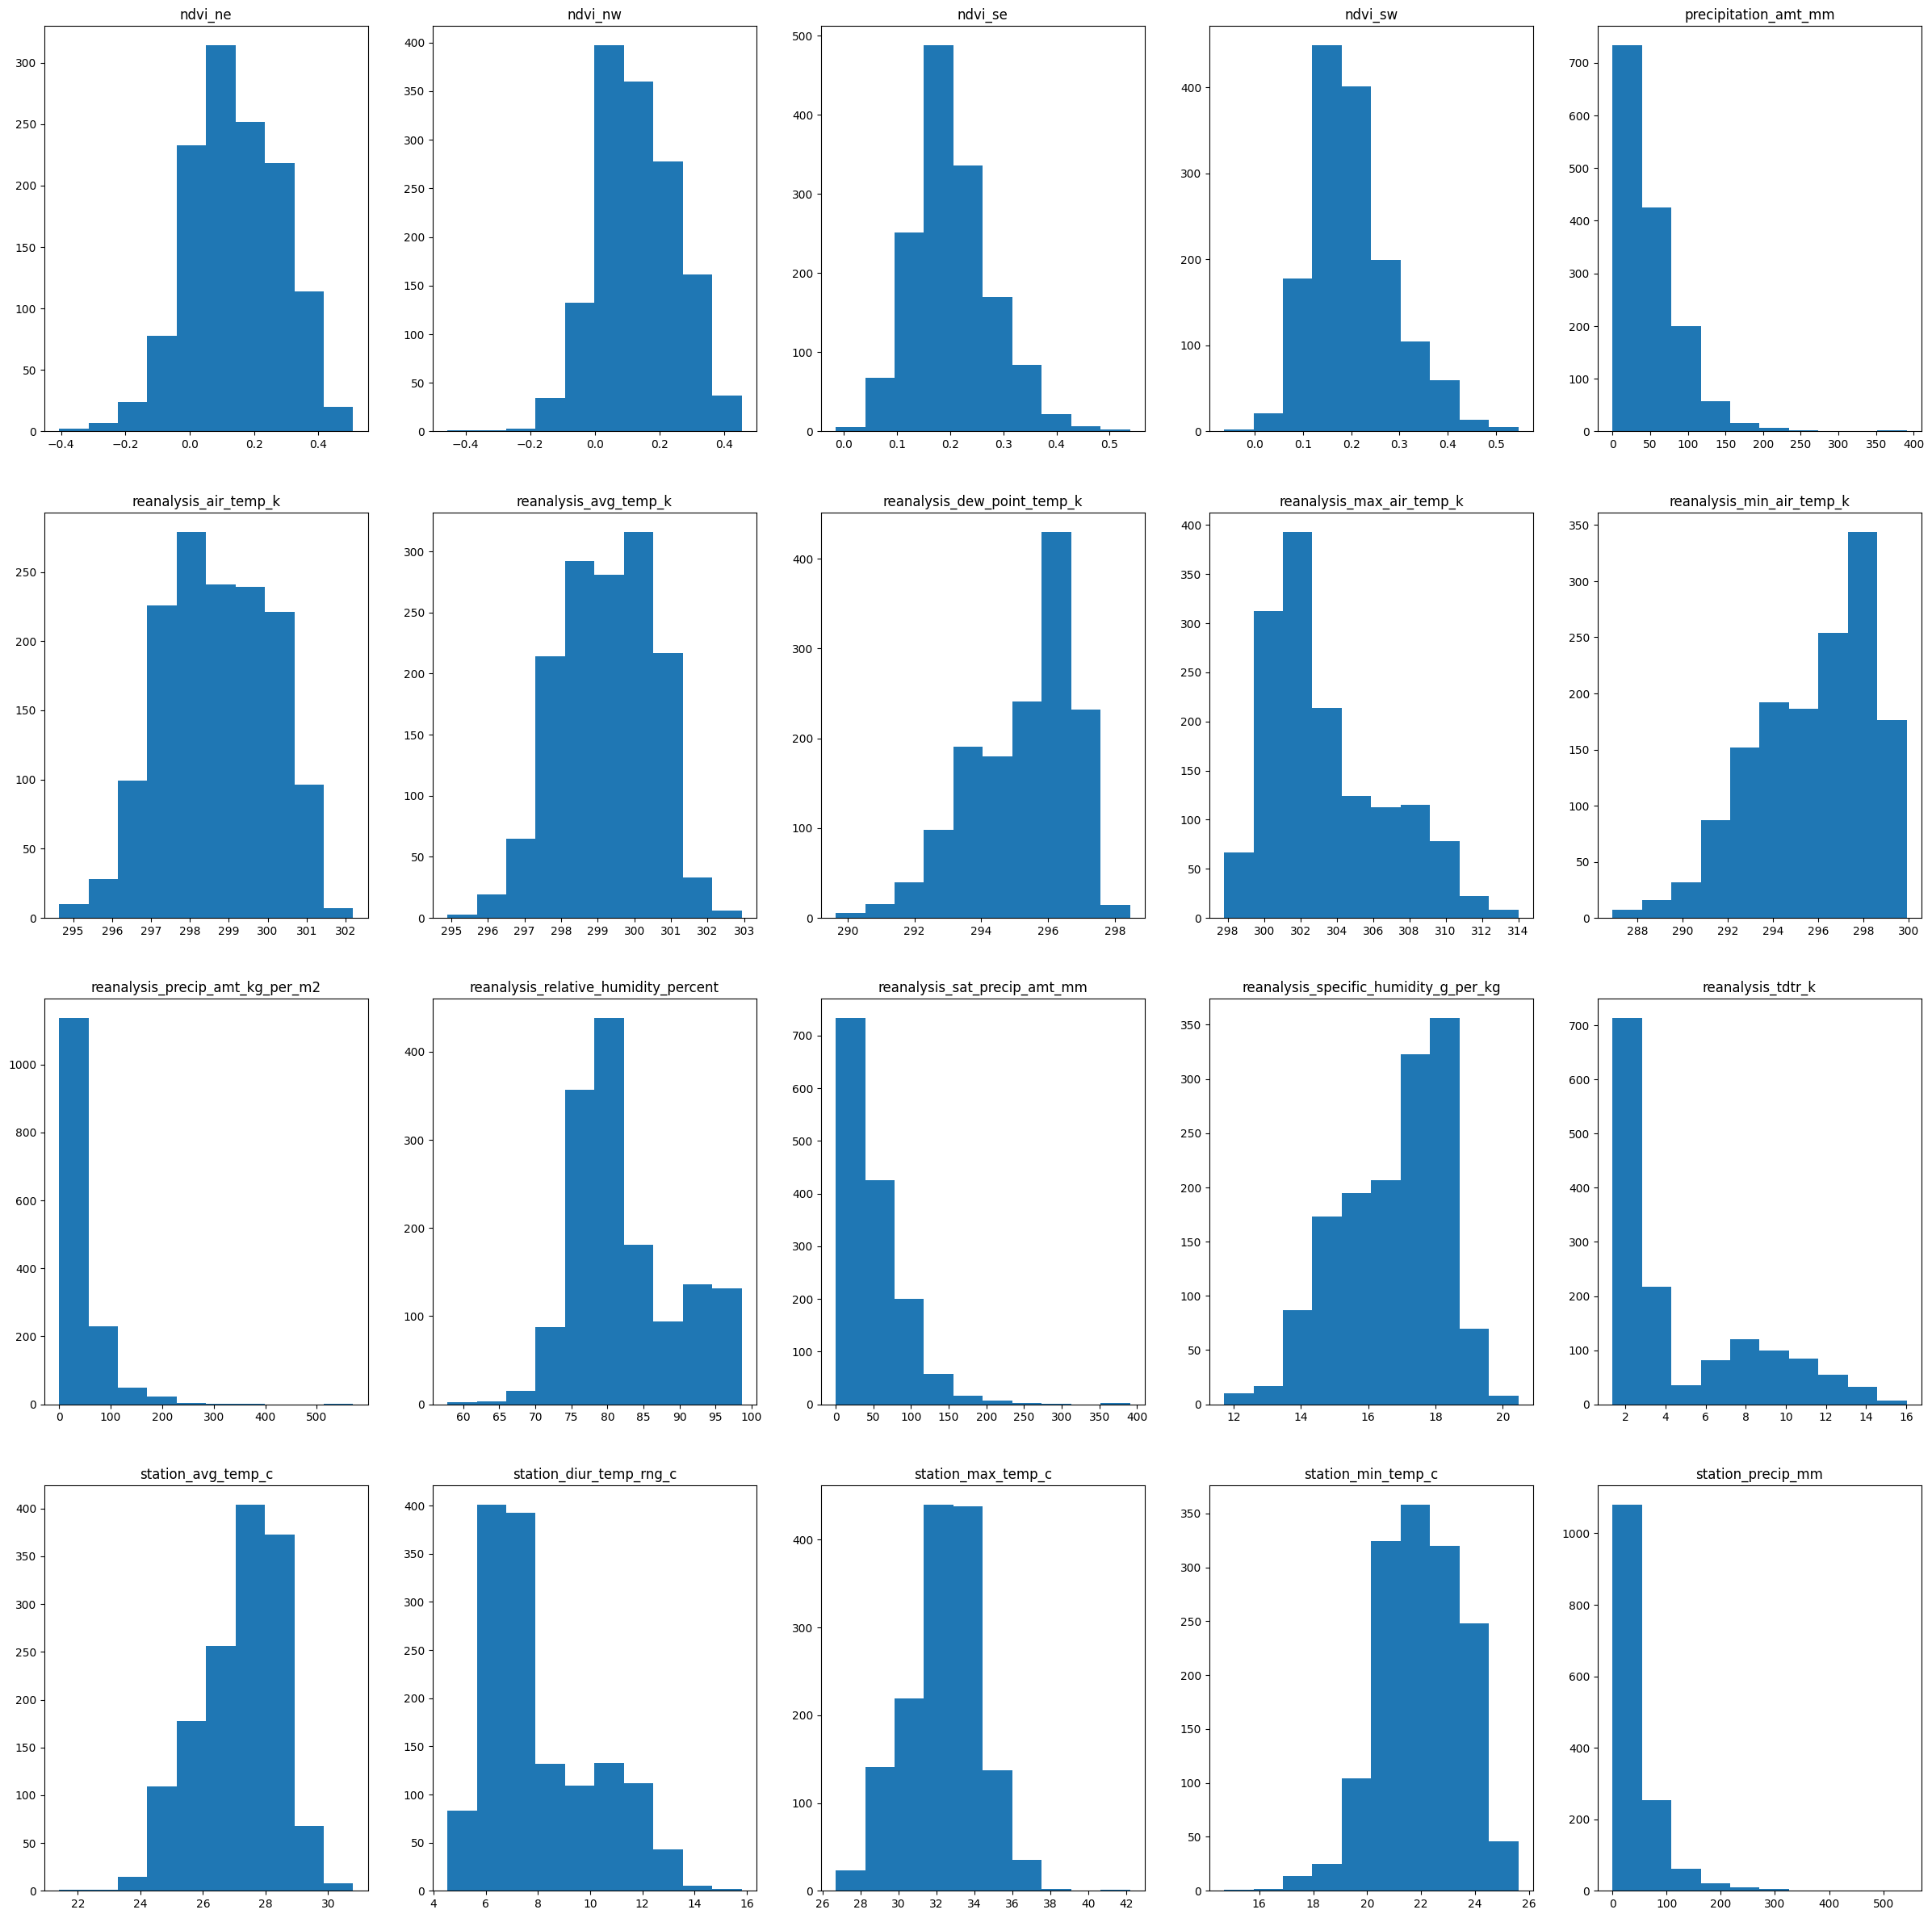

In [ ]:
#checking the distributions of the features
fig,ax=plt.subplots(figsize=(30,30),ncols=5,nrows=4)
count=0
features=X_train.columns[4:]
for i in range(4) :
  for j in range(5) :
    ax[i][j].hist(X_train_cp[features[count]])
    ax[i][j].set(title=features[count])
    count+=1

> We can conclude that some features here could use some transformations to make them normally distributed. Also, we can confirm the presence of outliers in certain features as seen above.

### Dealing with outliers

We will try different approaches when dealing with outliers, to see which ones work better.

In [ ]:
#function for replacing the outliers with the median
def replace_outliers_median(feature) :
    Q1=X_train_cp[feature].quantile(0.25)
    Q3=X_train_cp[feature].quantile(0.75)
    IQR=Q3-Q1
    upper_bound=Q3+(1.5*IQR)
    lower_bound=Q1-(1.5*IQR)
    outliers=np.where((X_train_cp[feature]>upper_bound) | (X_train_cp[feature]<lower_bound))
    for i in outliers :
      X_train_cp[feature].iloc[i]=X_train_cp[feature].median()

In [ ]:
features_with_outliers=[features[2],features[3],features[4],features[7],features[8],features[10],features[18],features[19],features[12]]
for feature in features_with_outliers :
    replace_outliers_median(feature)

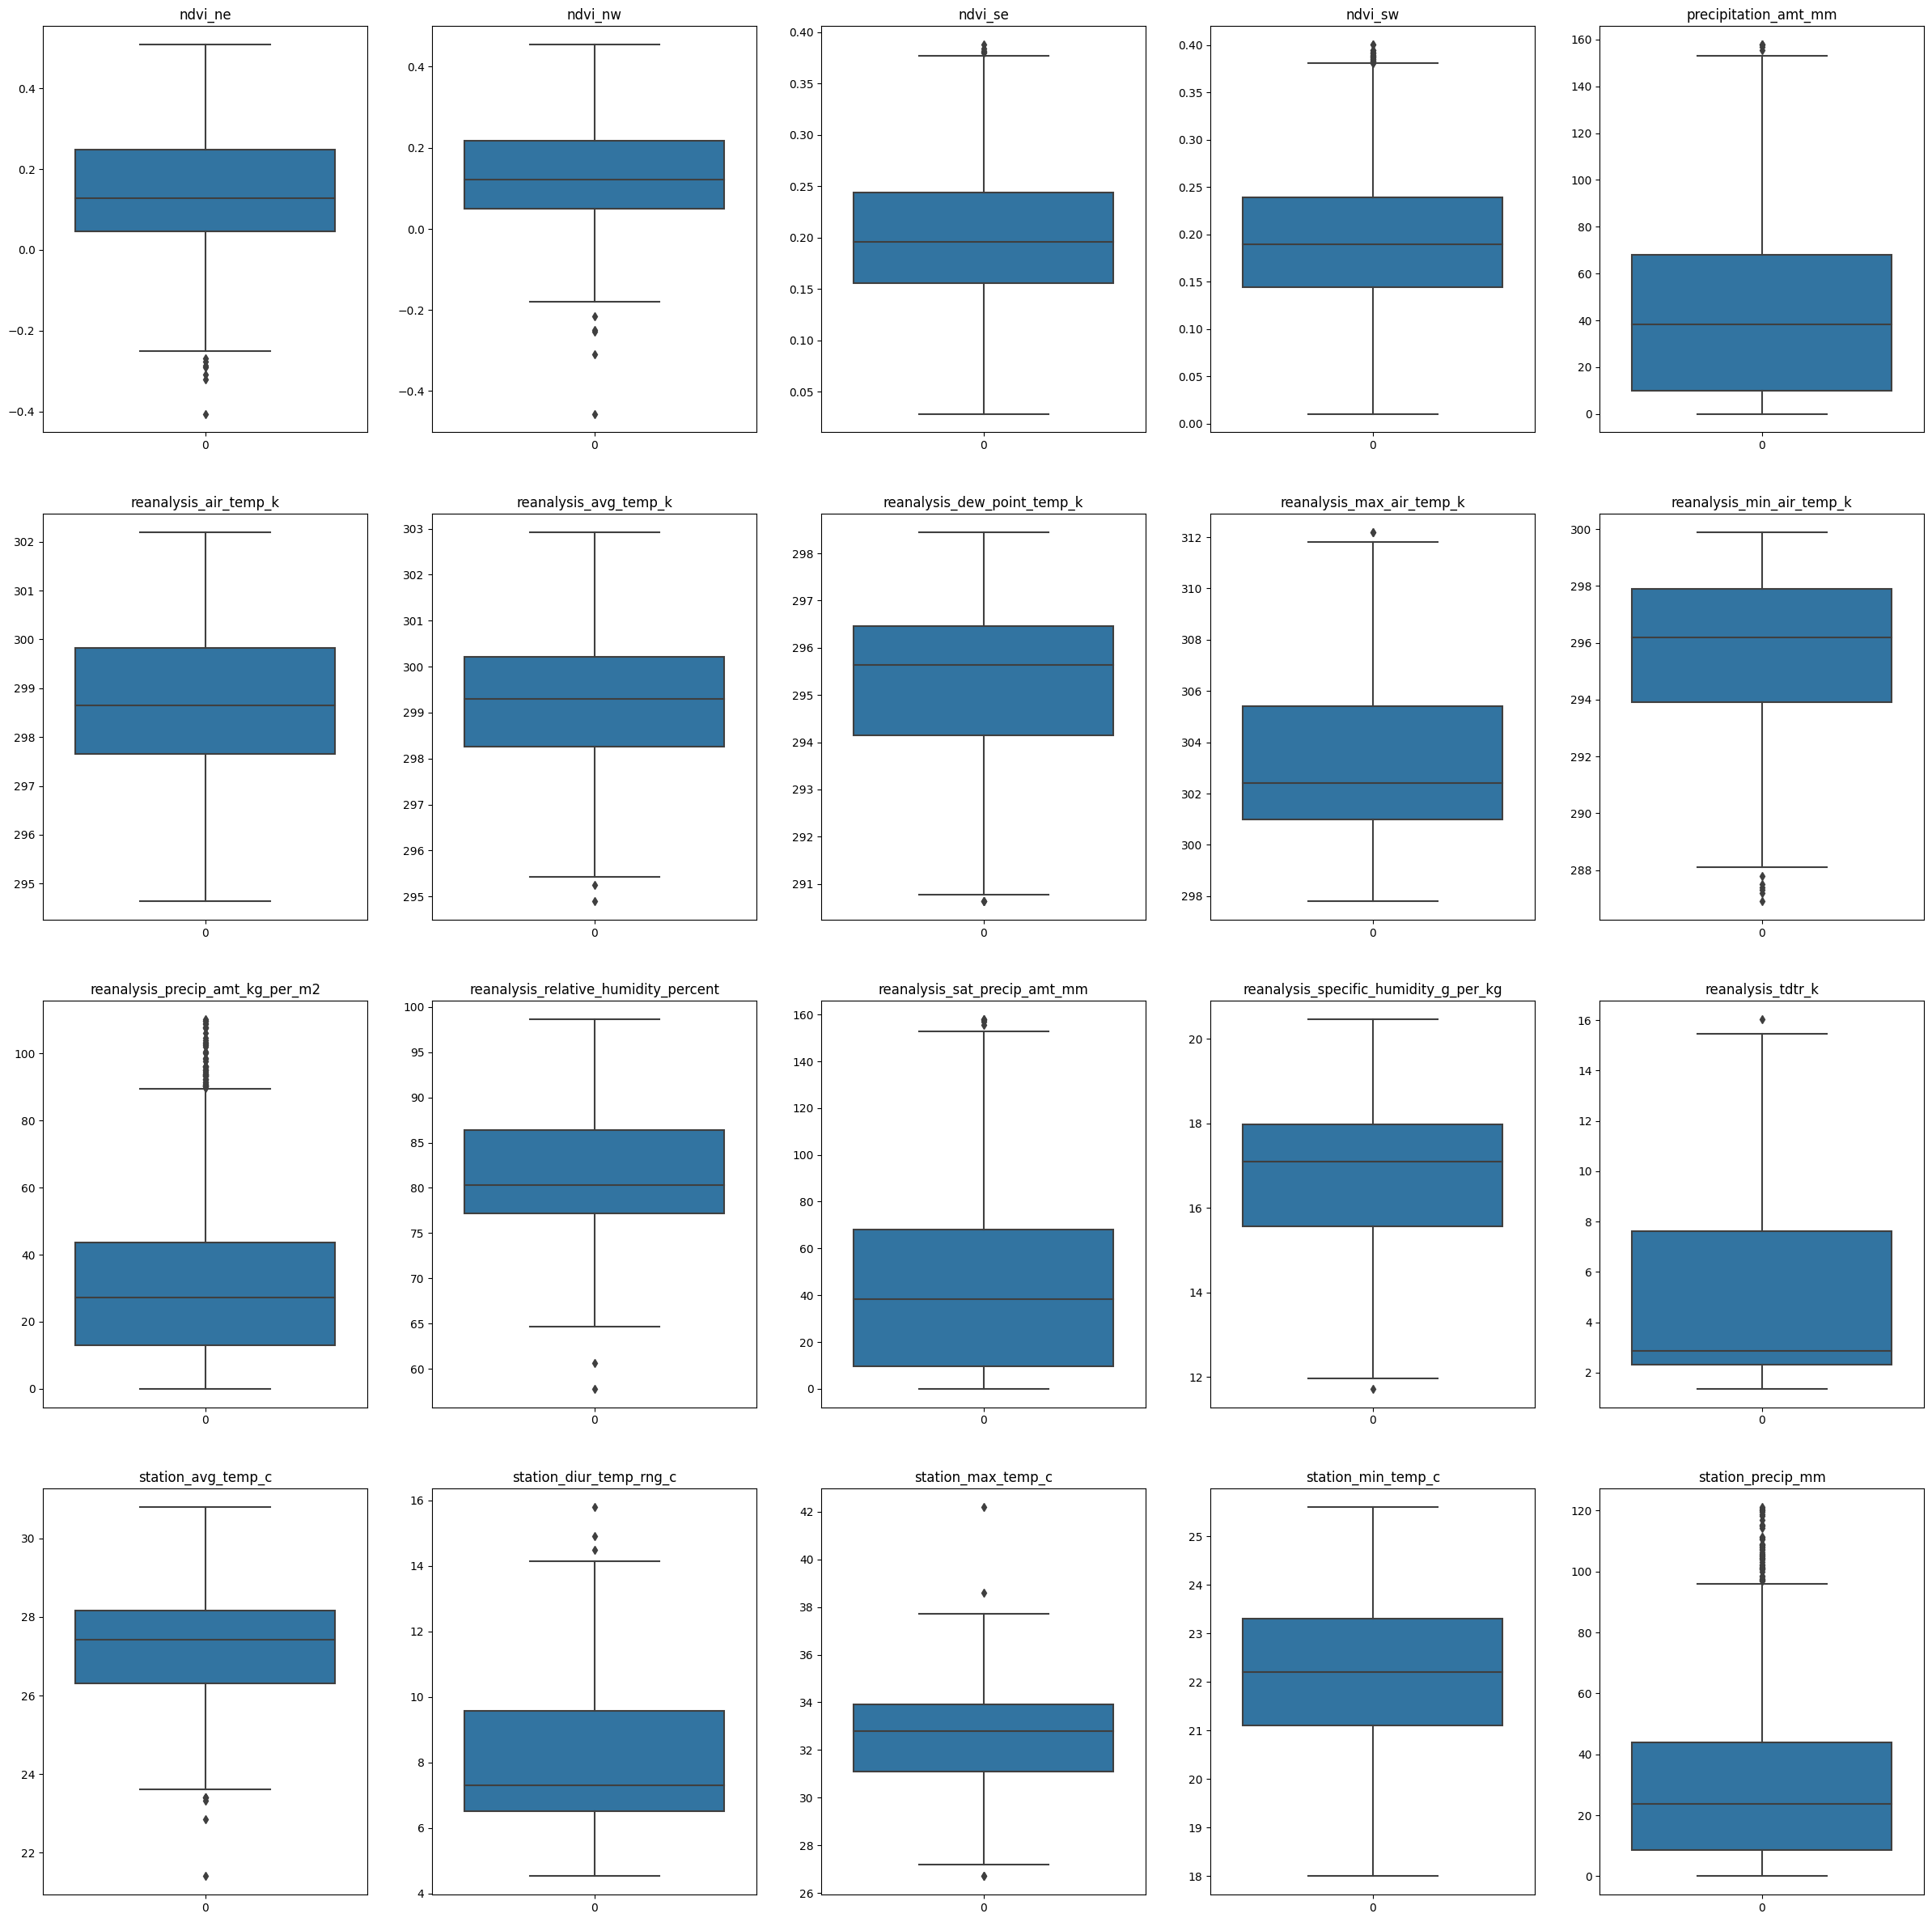

In [ ]:
#plotting the boxplots to check
fig,ax=plt.subplots(figsize=(30,30),ncols=5,nrows=4)
count=0
features=X_train.columns[4:]
for i in range(4) :
  for j in range(5) :
    sns.boxplot(X_train_cp[features[count]],ax=ax[i][j])
    ax[i][j].set_title(features[count])
    count+=1

###Feature engineering

####Square root transforming the right skewed features

Here we'll deal with just the features that we changed when we dealt with outliers

In [ ]:
def square_root(x) :
  if np.sqrt(x)==0.0 :
    pass
  else :
    return np.sqrt(x)
for feature in features_with_outliers :
  X_train_cp[feature]=X_train_cp[feature].apply(lambda x : square_root(x))

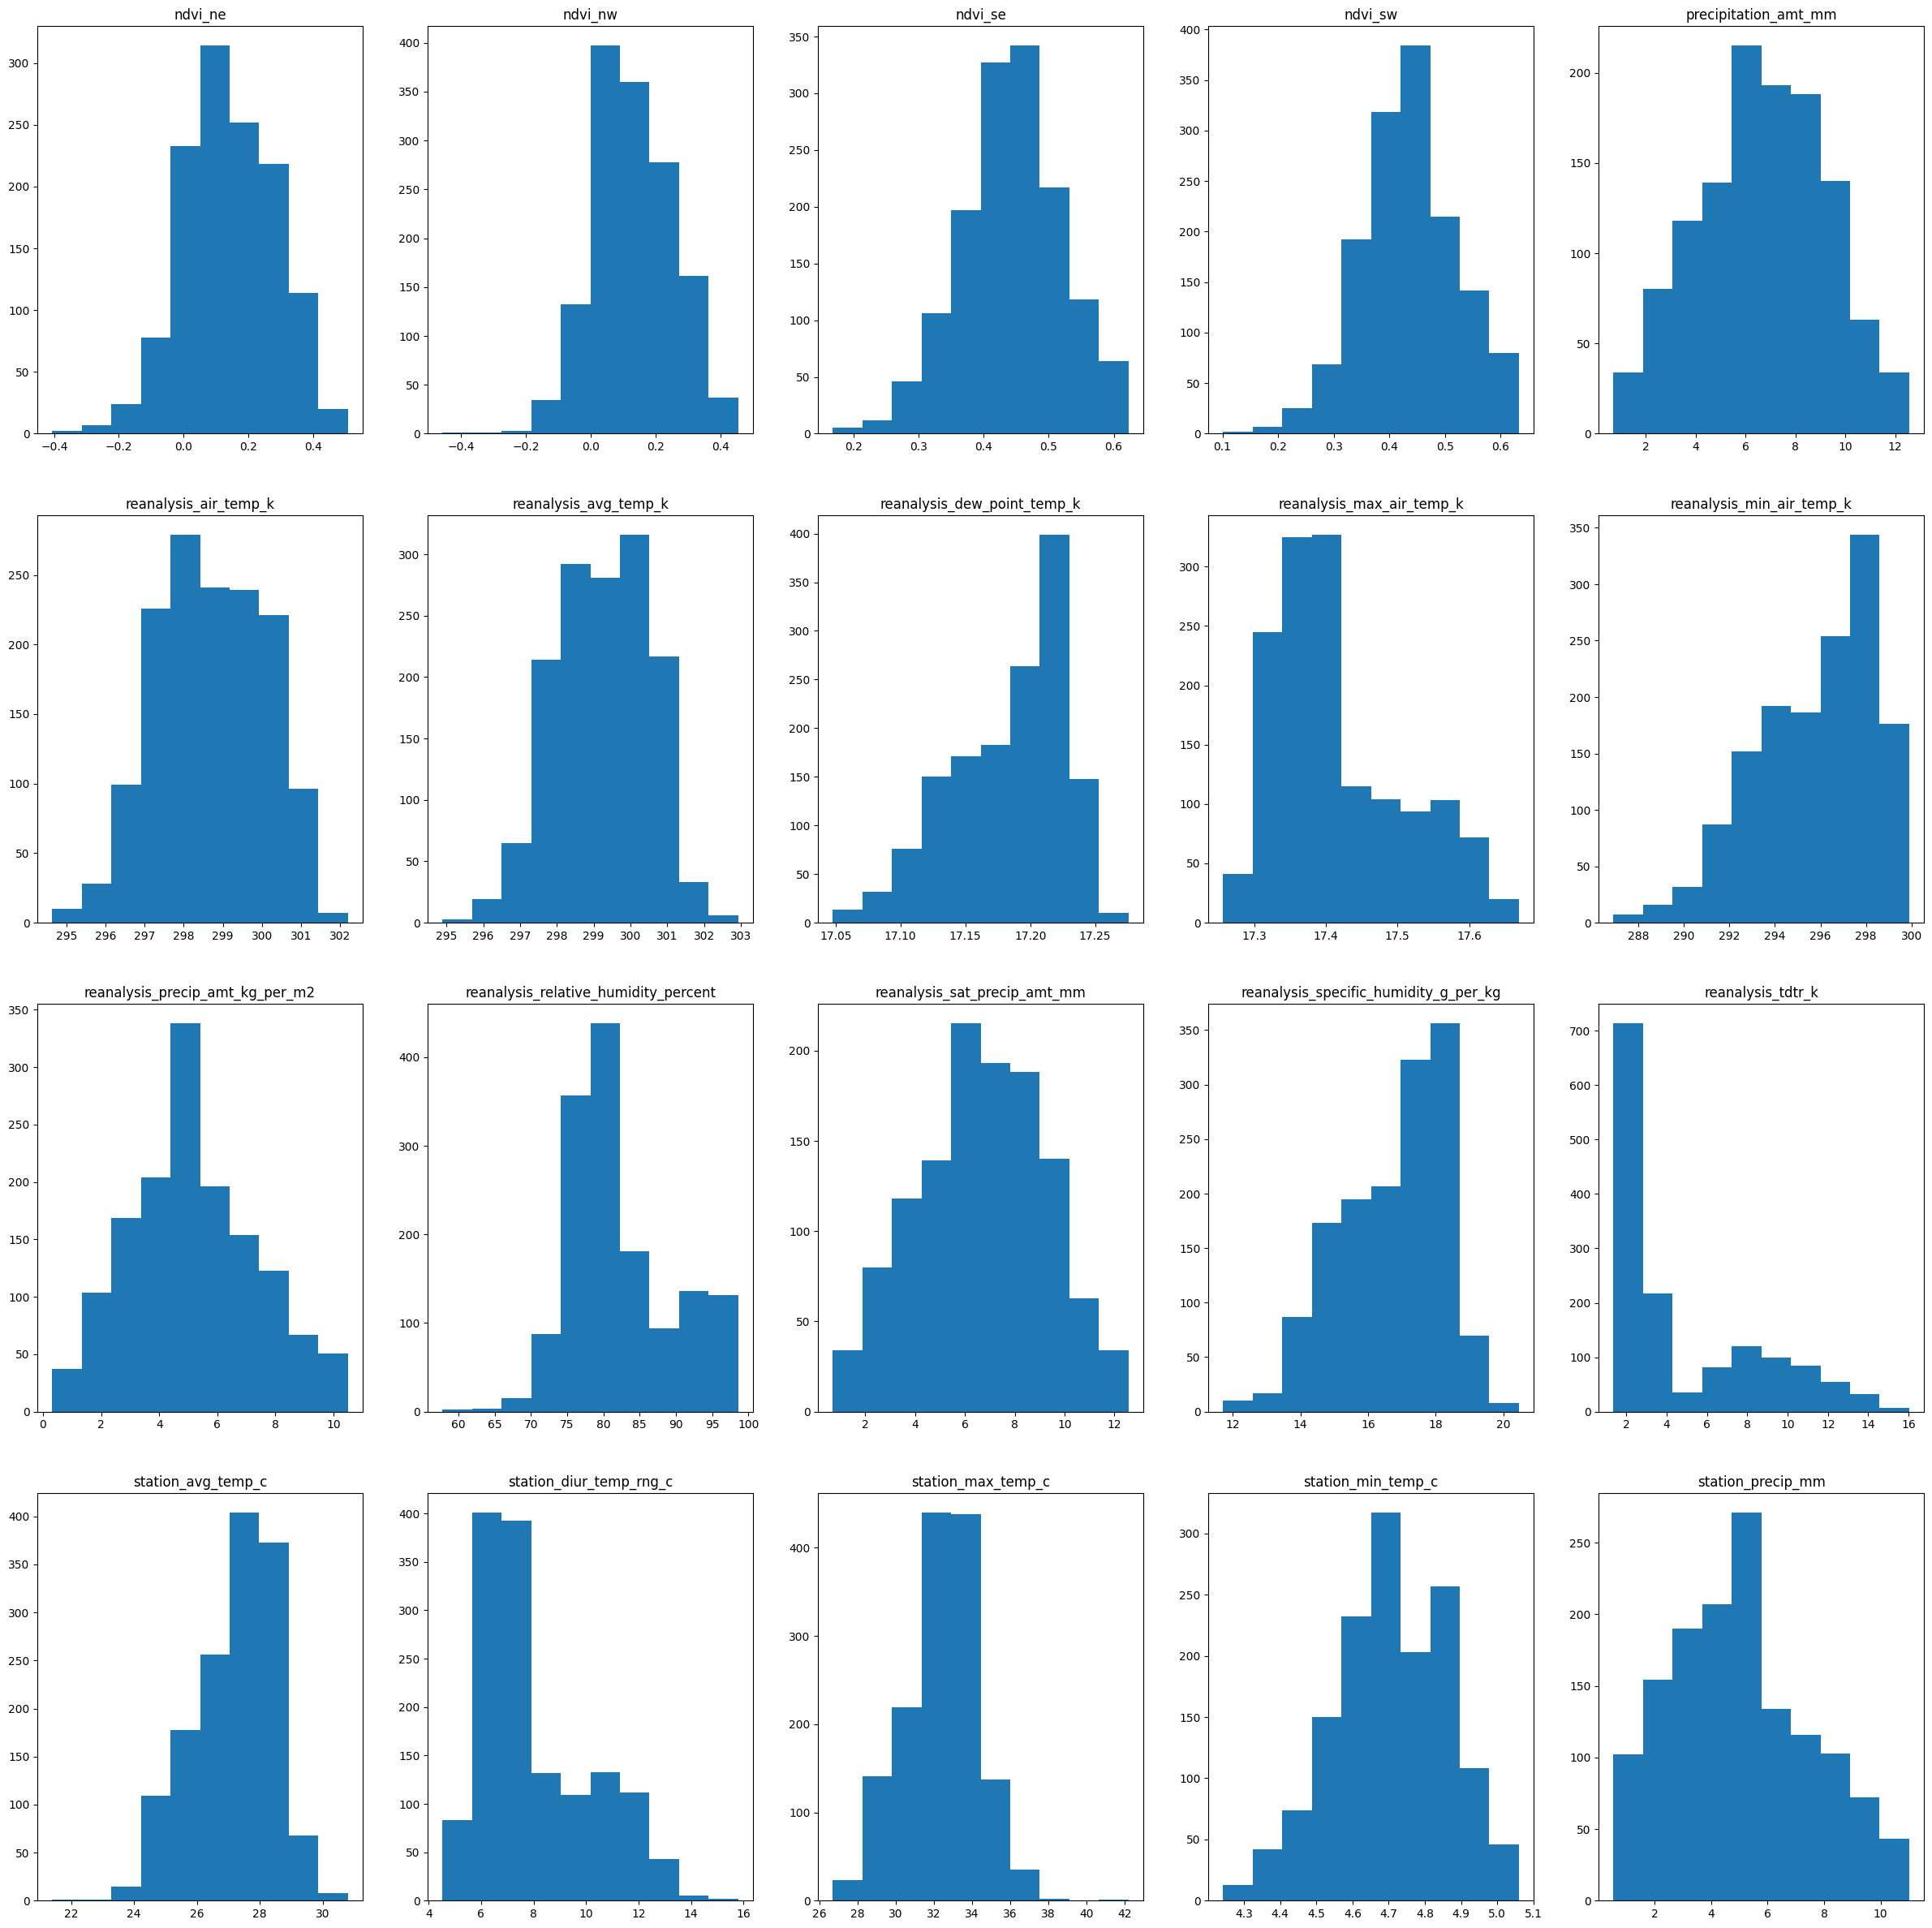

In [ ]:
#replotting the dist to see
fig,ax=plt.subplots(figsize=(30,30),ncols=5,nrows=4)
count=0
features=X_train.columns[4:]
for i in range(4) :
  for j in range(5) :
    ax[i][j].hist(X_train_cp[features[count]])
    ax[i][j].set(title=features[count])
    count+=1

> Now we can see that our features are normally distributed.

#### Generating some new features from the ```week_start_date``` feature



In [ ]:
X_train_cp["is_month_start"]=X_train_cp["week_start_date"].dt.is_month_start.astype("int")
X_train_cp["is_month_end"]=X_train_cp["week_start_date"].dt.is_month_end.astype("int")
X_train_cp["is_year_start"]=X_train_cp["week_start_date"].dt.is_year_start.astype("int")
X_train_cp["is_year_end"]=X_train_cp["week_start_date"].dt.is_year_end.astype("int")

In [ ]:
X_train_cp.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,is_month_start,is_month_end,is_year_start,day_of_week,city_iq,city_sj
0,1990,18,0.122600,0.103725,0.445515,0.421446,3.524202,297.572857,297.742857,17.100125,...,6.900000,29.4,4.472136,4.000000,0,1,0,0,0,1
1,1990,19,0.169900,0.142175,0.402936,0.394317,4.777028,298.211429,298.442857,17.145012,...,6.371429,31.7,4.711688,2.932576,0,0,0,0,0,1
2,1990,20,0.032250,0.172967,0.396485,0.413331,5.877074,298.781429,298.878571,17.188202,...,6.485714,32.2,4.774935,6.434283,0,0,0,0,0,1
3,1990,21,0.128633,0.245067,0.477029,0.485681,3.919184,298.987143,299.228571,17.184586,...,6.771429,33.3,4.827007,2.000000,0,0,0,0,0,1
4,1990,22,0.196200,0.262200,0.501199,0.497333,2.742262,299.518571,299.664286,17.199460,...,9.371429,35.0,4.888763,2.408319,0,0,0,0,0,1


In [ ]:
X_train_cp["is_year_end"].max()

0





> Notice that the ```is_year_end``` feature has only 0 values, so we're just going to drop it

In [ ]:
X_train_cp.drop("is_year_end",axis=1,inplace=True)

I will go ahead and add a feature of day of the week before dropping the ```is_year_end``` feature

In [ ]:
X_train_cp["day_of_week"]=X_train_cp["week_start_date"].dt.day_of_week

In [ ]:
X_train_cp.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,is_month_start,is_month_end,is_year_start,day_of_week
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.445515,0.421446,3.524202,297.572857,...,2.628571,25.442857,6.900000,29.4,4.472136,4.000000,0,1,0,0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.402936,0.394317,4.777028,298.211429,...,2.371429,26.714286,6.371429,31.7,4.711688,2.932576,0,0,0,0
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.396485,0.413331,5.877074,298.781429,...,2.300000,26.714286,6.485714,32.2,4.774935,6.434283,0,0,0,0
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.477029,0.485681,3.919184,298.987143,...,2.428571,27.471429,6.771429,33.3,4.827007,2.000000,0,0,0,0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.501199,0.497333,2.742262,299.518571,...,3.014286,28.942857,9.371429,35.0,4.888763,2.408319,0,0,0,0


In [ ]:
#dropping the week_start_date feature
X_train_cp.drop("week_start_date",axis=1,inplace=True)

### Dealing with missing values

We will opt for a mean-imputing strategy for this one.

In [ ]:
features_with_na=[feature for feature in X_train_cp.columns if X_train_cp[feature].isna().max()]
for feature in features_with_na :
    X_train_cp[feature].fillna(value=X_train_cp[feature].mean(),inplace=True)

In [ ]:
X_train_cp.isna().sum()

city                                     0
year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
is_month_st

### Encoding the categorical variable ```city```

We will use one hot encoding for this one because we only have two values for this feature.

In [ ]:
X_train_cp=pd.get_dummies(X_train_cp,columns=["city"])
X_train_cp.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,is_month_start,is_month_end,is_year_start,day_of_week,city_iq,city_sj
0,1990,18,0.122600,0.103725,0.445515,0.421446,3.524202,297.572857,297.742857,17.100125,...,6.900000,29.4,4.472136,4.000000,0,1,0,0,0,1
1,1990,19,0.169900,0.142175,0.402936,0.394317,4.777028,298.211429,298.442857,17.145012,...,6.371429,31.7,4.711688,2.932576,0,0,0,0,0,1
2,1990,20,0.032250,0.172967,0.396485,0.413331,5.877074,298.781429,298.878571,17.188202,...,6.485714,32.2,4.774935,6.434283,0,0,0,0,0,1
3,1990,21,0.128633,0.245067,0.477029,0.485681,3.919184,298.987143,299.228571,17.184586,...,6.771429,33.3,4.827007,2.000000,0,0,0,0,0,1
4,1990,22,0.196200,0.262200,0.501199,0.497333,2.742262,299.518571,299.664286,17.199460,...,9.371429,35.0,4.888763,2.408319,0,0,0,0,0,1


In [ ]:
#saving the preprocessed data to a csv file to continue tomorrow inshallah
X_train_cp.to_csv("/content/drive/MyDrive/dengAI/preprocessed_data.csv",index=False)

In [ ]:
#i'm back, let's import the data
X_train_cp=pd.read_csv("/content/drive/MyDrive/dengAI/preprocessed_data.csv")

### Scaling the features with big values

In [ ]:
features_to_scale=[feature for feature in X_train_cp.columns[4:] if X_train_cp[feature].max()>1 and feature!="day_of_week"]
features_to_scale

['precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

In [ ]:
features_to_scale_matrix=X_train_cp[features_to_scale]
features_to_scale_matrix.head()

,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,3.524202,297.572857,297.742857,17.100125,17.314734,295.9,5.656854,73.365714,3.524202,14.012857,2.628571,25.442857,6.900000,29.4,4.472136,4.000000
1,4.777028,298.211429,298.442857,17.145012,17.346469,296.4,4.235564,77.368571,4.777028,15.372857,2.371429,26.714286,6.371429,31.7,4.711688,2.932576
2,5.877074,298.781429,298.878571,17.188202,17.334936,297.3,5.108816,82.052857,5.877074,16.848571,2.300000,26.714286,6.485714,32.2,4.774935,6.434283
3,3.919184,298.987143,299.228571,17.184586,17.360876,297.0,3.728270,80.337143,3.919184,16.672857,2.428571,27.471429,6.771429,33.3,4.827007,2.000000
4,2.742262,299.518571,299.664286,17.199460,17.375270,297.5,3.492850,80.460000,2.742262,17.210000,3.014286,28.942857,9.371429,35.0,4.888763,2.408319


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_features=pd.DataFrame(scaler.fit_transform(features_to_scale_matrix),columns=features_to_scale)
scaled_features.head()

,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0.238043,0.388291,0.354667,0.229201,0.140313,0.692308,0.524793,0.381614,0.238043,0.262659,0.086660,0.430091,0.210393,0.174194,0.280899,0.330003
1,0.343640,0.472710,0.441778,0.426253,0.217285,0.730769,0.385131,0.479668,0.343640,0.418164,0.069133,0.565350,0.163498,0.322581,0.574106,0.227968
2,0.436360,0.548064,0.496000,0.615858,0.189312,0.800000,0.470941,0.594415,0.436360,0.586900,0.064265,0.565350,0.173638,0.354839,0.651520,0.562695
3,0.271335,0.575260,0.539556,0.599985,0.252227,0.776923,0.335282,0.552387,0.271335,0.566808,0.073028,0.645897,0.198986,0.425806,0.715256,0.138823
4,0.172136,0.645515,0.593778,0.665282,0.287139,0.815385,0.312149,0.555396,0.172136,0.628226,0.112950,0.802432,0.429658,0.535484,0.790843,0.177854


In [ ]:
for feature in features_to_scale :
    X_train_cp[feature]=scaled_features[feature]
X_train_cp.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,is_month_start,is_month_end,is_year_start,day_of_week,city_iq,city_sj
0,1990,18,0.122600,0.103725,0.445515,0.421446,0.238043,0.388291,0.354667,0.229201,...,0.210393,0.174194,0.280899,0.330003,0,1,0,0,0,1
1,1990,19,0.169900,0.142175,0.402936,0.394317,0.343640,0.472710,0.441778,0.426253,...,0.163498,0.322581,0.574106,0.227968,0,0,0,0,0,1
2,1990,20,0.032250,0.172967,0.396485,0.413331,0.436360,0.548064,0.496000,0.615858,...,0.173638,0.354839,0.651520,0.562695,0,0,0,0,0,1
3,1990,21,0.128633,0.245067,0.477029,0.485681,0.271335,0.575260,0.539556,0.599985,...,0.198986,0.425806,0.715256,0.138823,0,0,0,0,0,1
4,1990,22,0.196200,0.262200,0.501199,0.497333,0.172136,0.645515,0.593778,0.665282,...,0.429658,0.535484,0.790843,0.177854,0,0,0,0,0,1


In [ ]:
#saving the preprocessed data to a csv file to continue tomorrow inshallah
X_train_cp.to_csv("/content/drive/MyDrive/dengAI/Training data/preprocessed_data_final.csv",index=False)

> with this i think we're done here with the EDA section, let's model!

##Modeling

In [ ]:
#importing the preprocessed data
X_train_cp=pd.read_csv("/content/drive/MyDrive/dengAI/Training data/preprocessed_data_final.csv")

In [ ]:
#splitting the data into training and validation subsets
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_s_train,X_s_val,y_s_train,y_s_val=train_test_split(X_train_cp,y_train,test_size=0.2)

In [ ]:
#importing the models we'll work with
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [ ]:
#initializing
rf_rg=RandomForestRegressor()
cat_rg=CatBoostRegressor()
xg_rg=XGBRegressor()

In [ ]:
#function to intitialize and fit the models
def fit_models(models,X_train,y_train) :
    for model in models :
        model.fit(X_train,y_train)

In [ ]:
fit_models([rf_rg,cat_rg,xg_rg],X_s_train,y_s_train)

Learning rate set to 0.041937
0:	learn: 38.8516882	total: 6.04ms	remaining: 6.03s
1:	learn: 38.1331186	total: 11ms	remaining: 5.5s
2:	learn: 37.3473591	total: 16.3ms	remaining: 5.43s
3:	learn: 36.8086780	total: 24.6ms	remaining: 6.12s
4:	learn: 36.2641463	total: 32.9ms	remaining: 6.54s
5:	learn: 35.7541972	total: 41.4ms	remaining: 6.85s
6:	learn: 35.0269922	total: 46.5ms	remaining: 6.6s
7:	learn: 34.4988366	total: 52.6ms	remaining: 6.52s
8:	learn: 33.8173997	total: 57.6ms	remaining: 6.34s
9:	learn: 33.2166791	total: 62.5ms	remaining: 6.19s
10:	learn: 32.5922934	total: 67.5ms	remaining: 6.07s
11:	learn: 32.0148655	total: 72.9ms	remaining: 6s
12:	learn: 31.6811148	total: 77.9ms	remaining: 5.92s
13:	learn: 31.2754699	total: 83.5ms	remaining: 5.88s
14:	learn: 30.6917297	total: 91.8ms	remaining: 6.03s
15:	learn: 30.3920309	total: 97.6ms	remaining: 6s
16:	learn: 30.0763961	total: 102ms	remaining: 5.91s
17:	learn: 29.6726608	total: 107ms	remaining: 5.84s
18:	learn: 29.2281983	total: 112ms	rem

In [ ]:
#function for scoring the models
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def score_models(models,X,y) :
    scores={}
    for model_name,model in models.items() :
      scores[model_name]={"MAE" : mean_absolute_error(y,model.predict(X)),
                          "R2" : r2_score(y,model.predict(X))*100}
    return scores

<Axes: >

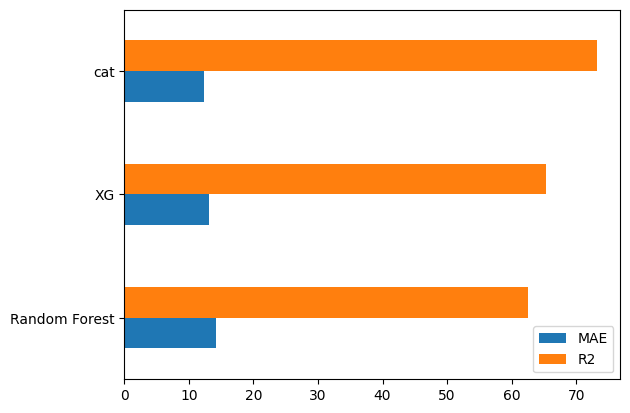

In [ ]:
pd.DataFrame(score_models({"Random Forest" : rf_rg,
              "XG" : xg_rg,
              "cat" : cat_rg},X_s_val,y_s_val)).T.plot(kind="barh")

> the gradient boosting algorithms are working better than the random forest, but we will see who wins after we fine tune them.

##Hyperparameter Tuning

### RandomizedSearchCV

In [ ]:
#making the grids
cat_grid={'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3]}
xg_grid={"booster": ['gbtree','gblinear'],
"base_score" :[0.25,0.5,0.75,1],
"n_estimators" : [100, 500, 900, 1100, 1500],
"max_depth" : [2, 3, 5, 10, 15],
"booster" : ['gbtree','gblinear'],
"learning_rate" :[0.05,0.1,0.15,0.20],
"min_child_weight" : [1,2,3,4]}

rf_grid={'bootstrap': [True, False],
         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [200]}


In [ ]:
#initializing the baseline models
rf_rg=RandomForestRegressor()
xg_rg=XGBRegressor()
cat_rg=CatBoostRegressor()

#### CatBoostRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
cat_rs=RandomizedSearchCV(cat_rg,cv=5,verbose=2,param_distributions=cat_grid,refit=True,scoring="neg_mean_absolute_error",n_iter=200,n_jobs=-1,random_state=42)
cat_rs.fit(X_s_train,y_s_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0:	learn: 38.0461322	total: 24.1ms	remaining: 6.01s
1:	learn: 36.0092371	total: 40ms	remaining: 4.96s
2:	learn: 34.2884675	total: 54.9ms	remaining: 4.52s
3:	learn: 32.8003572	total: 69.9ms	remaining: 4.3s
4:	learn: 31.5610142	total: 85.6ms	remaining: 4.19s
5:	learn: 30.2735664	total: 101ms	remaining: 4.11s
6:	learn: 29.0663930	total: 116ms	remaining: 4.02s
7:	learn: 28.5938946	total: 131ms	remaining: 3.97s
8:	learn: 27.5926607	total: 146ms	remaining: 3.92s
9:	learn: 27.0049681	total: 161ms	remaining: 3.87s
10:	learn: 26.0269704	total: 176ms	remaining: 3.83s
11:	learn: 25.0672788	total: 191ms	remaining: 3.79s
12:	learn: 24.3852560	total: 210ms	remaining: 3.82s
13:	learn: 23.6795561	total: 242ms	remaining: 4.08s
14:	learn: 22.9030847	total: 256ms	remaining: 4.01s
15:	learn: 22.1390710	total: 271ms	remaining: 3.96s
16:	learn: 21.5028576	total: 290ms	remaining: 3.97s
17:	learn: 20.6733449	total: 308ms	remaining: 3.97s
18:	learn

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7f8af46bfdc0>,
                   n_iter=200, n_jobs=-1,
                   param_distributions={'depth': [3, 1, 2, 6, 4, 5, 7, 8, 9,
                                                  10],
                                        'iterations': [250, 100],
                                        'learning_rate': [0.03, 0.001, 0.01,
                                                          0.1, 0.2, 0.3]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [ ]:
score_models({"CatBoost" : cat_rs.best_estimator_},X_s_val,y_s_val)

{'CatBoost': {'MAE': 13.651570338394967, 'R2': 66.45215024764332}}

####XGBRegressor

In [ ]:
xg_rs=RandomizedSearchCV(xg_rg,cv=5,verbose=2,param_distributions=xg_grid,refit=True,scoring="neg_mean_absolute_error",n_iter=200,n_jobs=-1,random_state=42)
xg_rs.fit(X_s_train,y_s_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [ ]:
score_models({"XGBoost" : xg_rs.best_estimator_},X_s_val,y_s_val)

{'XGBoost': {'MAE': 13.33254392181, 'R2': 58.2075323164639}}

#### RandomForestRegressor

In [ ]:
rf_rs=RandomizedSearchCV(rf_rg,cv=5,verbose=2,param_distributions=rf_grid,refit=True,scoring="neg_mean_absolute_error",n_iter=200,n_jobs=-1,random_state=42)
rf_rs.fit(X_s_train,y_s_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [ ]:
score_models({"Random Forest" : rf_rs.best_estimator_},X_s_val,y_s_val)

{'XGBoost': {'MAE': 14.139582501260152, 'R2': 60.593246181292585}}

##Making predictions

In [ ]:
#getting the test data
test_data=pd.read_csv("/content/drive/MyDrive/dengAI/Test data/dengue_features_test.csv")
test_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [ ]:
#preprocessing the test data
#generating features
test_data["week_start_date"]=pd.to_datetime(test_data["week_start_date"])
test_data["is_month_start"]=test_data["week_start_date"].dt.is_month_start.astype("int")
test_data["is_month_end"]=test_data["week_start_date"].dt.is_month_end.astype("int")
test_data["is_year_start"]=test_data["week_start_date"].dt.is_year_start.astype("int")
test_data["day_of_week"]=test_data["week_start_date"].dt.day_of_week
#replacing missing values with mean
features_with_na=[feature for feature in test_data.columns if test_data[feature].isna().max()]
for feature in features_with_na :
    test_data[feature].fillna(value=test_data[feature].mean(),inplace=True)
#encoding city
test_data=pd.get_dummies(test_data,columns=["city"])
#scaling features
features_to_scale=[feature for feature in test_data.columns[4:] if test_data[feature].max()>1 and feature!="day_of_week"]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_features=pd.DataFrame(scaler.fit_transform(test_data[features_to_scale]),columns=features_to_scale)
for feature in features_to_scale :
   test_data[feature]=scaled_features[feature]
test_data.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,is_month_start,is_month_end,is_year_start,day_of_week,city_iq,city_sj
0,2008,18,2008-04-29,-0.01890,-0.018900,0.102729,0.091200,0.464155,0.533578,0.409532,...,0.282180,0.544643,0.600,0.354717,0,0,0,1,0,1
1,2008,19,2008-05-06,-0.01800,-0.012400,0.082043,0.072314,0.074170,0.531256,0.410415,...,0.141759,0.250000,0.640,0.161792,0,0,0,1,0,1
2,2008,20,2008-05-13,-0.00150,0.126803,0.151083,0.091529,0.021613,0.664022,0.509267,...,0.350384,0.500000,0.688,0.014151,0,0,0,1,0,1
3,2008,21,2008-05-20,0.12605,-0.019867,0.124329,0.125686,0.000000,0.695762,0.555163,...,0.208626,0.544643,0.816,0.001415,0,0,0,1,0,1
4,2008,22,2008-05-27,0.05680,0.039833,0.062267,0.075914,0.004488,0.707954,0.548102,...,0.284855,0.544643,0.728,0.396698,0,0,0,1,0,1


In [ ]:
test_data.drop("week_start_date",axis=1,inplace=True)

In [ ]:
test_data.to_csv("/content/drive/MyDrive/dengAI/Test data/preprocessed_test_data.csv",index=False)

In [ ]:
#training the models with the full data
from xgboost import XGBRegressor
xg_rg=XGBRegressor()
xg_rg.fit(X_train_cp,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/dengAI/Test data/dengue_features_test.csv")

In [ ]:
#making preds
cat_preds=np.ceil(xg_rg.predict(test_data))
kaggle_sub_1=pd.concat([test[["city","year","weekofyear"]],pd.DataFrame(cat_preds,columns=["total_cases"])],axis=1)
kaggle_sub_1["total_cases"]=kaggle_sub_1["total_cases"].astype("int")
kaggle_sub_1.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,1
1,sj,2008,19,1
2,sj,2008,20,1
3,sj,2008,21,8
4,sj,2008,22,17


In [ ]:
kaggle_sub_1.to_csv("/content/drive/MyDrive/dengAI/ks5.csv",index=False)

## Experimenting

In [ ]:
#performing a different EDA
X_train_2=X_train.copy()

In [ ]:
#preprocessing the data
X_train_2.week_start_date=pd.to_datetime(X_train_2.week_start_date)
X_train_2["is_month_start"]=X_train_2["week_start_date"].dt.is_month_start.astype("int")
X_train_2["is_month_end"]=X_train_2["week_start_date"].dt.is_month_end.astype("int")
X_train_2["is_year_start"]=X_train_2["week_start_date"].dt.is_year_start.astype("int")
X_train_2["day_of_week"]=X_train_2["week_start_date"].dt.day_of_week
X_train_2.drop("week_start_date",axis=1,inplace=True)
#missing values
features_with_na=[feature for feature in X_train_2.columns if X_train_2[feature].isna().max()]
for feature in features_with_na :
    X_train_2[feature].fillna(value=X_train_2[feature].median(),inplace=True)
#encoding
X_train_2=pd.get_dummies(X_train_2,columns=["city"])
#scaling features
features_to_scale=[feature for feature in X_train_2.columns[4:] if X_train_2[feature].max()>1 and feature!="day_of_week"]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_features=pd.DataFrame(scaler.fit_transform(X_train_2[features_to_scale]),columns=features_to_scale)
for feature in features_to_scale :
   X_train_2[feature]=scaled_features[feature]

In [ ]:
X_train_2.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,is_month_start,is_month_end,is_year_start,day_of_week,city_iq,city_sj
0,1990,18,0.122600,0.103725,0.198483,0.177617,0.031797,0.388291,0.354667,0.314680,...,0.210393,0.174194,0.486239,0.029450,0,1,0,0,0,1
1,1990,19,0.169900,0.142175,0.162357,0.155486,0.058423,0.472710,0.441778,0.489213,...,0.163498,0.322581,0.688073,0.015829,0,0,0,0,0,1
2,1990,20,0.032250,0.172967,0.157200,0.170843,0.088428,0.548064,0.496000,0.657583,...,0.173638,0.354839,0.743119,0.076201,0,0,0,0,0,1
3,1990,21,0.128633,0.245067,0.227557,0.235886,0.039324,0.575260,0.539556,0.643471,...,0.198986,0.425806,0.788991,0.007362,0,0,0,0,0,1
4,1990,22,0.196200,0.262200,0.251200,0.247340,0.019252,0.645515,0.593778,0.701541,...,0.429658,0.535484,0.844037,0.010676,0,0,0,0,0,1


In [ ]:
#catboost
from catboost import CatBoostRegressor
cat_rg=CatBoostRegressor()
cat_rg.fit(X_train_2,y_train)

Learning rate set to 0.043447
0:	learn: 42.7082082	total: 7.2ms	remaining: 7.19s
1:	learn: 41.9338566	total: 12.9ms	remaining: 6.42s
2:	learn: 41.0704886	total: 18.4ms	remaining: 6.12s
3:	learn: 40.2440708	total: 24.9ms	remaining: 6.2s
4:	learn: 39.4527111	total: 34.2ms	remaining: 6.8s
5:	learn: 38.7884083	total: 39.2ms	remaining: 6.5s
6:	learn: 38.1272891	total: 44.3ms	remaining: 6.29s
7:	learn: 37.3034670	total: 49.2ms	remaining: 6.1s
8:	learn: 36.6193201	total: 55.1ms	remaining: 6.07s
9:	learn: 35.9261166	total: 63.8ms	remaining: 6.32s
10:	learn: 35.5359020	total: 68.7ms	remaining: 6.18s
11:	learn: 34.8800362	total: 73.8ms	remaining: 6.07s
12:	learn: 34.2112845	total: 79.1ms	remaining: 6.01s
13:	learn: 33.6977447	total: 83.9ms	remaining: 5.91s
14:	learn: 33.0943010	total: 88.6ms	remaining: 5.82s
15:	learn: 32.6345267	total: 94.1ms	remaining: 5.78s
16:	learn: 32.2744095	total: 103ms	remaining: 5.93s
17:	learn: 31.7297481	total: 111ms	remaining: 6.04s
18:	learn: 31.2229994	total: 119m

In [ ]:
#getting the test data
test_data=pd.read_csv("/content/drive/MyDrive/dengAI/Test data/dengue_features_test.csv")
test_data.head()
#preprocess it
test_data.week_start_date=pd.to_datetime(test_data.week_start_date)
test_data["is_month_start"]=test_data["week_start_date"].dt.is_month_start.astype("int")
test_data["is_month_end"]=test_data["week_start_date"].dt.is_month_end.astype("int")
test_data["is_year_start"]=test_data["week_start_date"].dt.is_year_start.astype("int")
test_data["day_of_week"]=test_data["week_start_date"].dt.day_of_week
test_data.drop("week_start_date",axis=1,inplace=True)
#missing values
features_with_na=[feature for feature in test_data.columns if test_data[feature].isna().max()]
for feature in features_with_na :
    test_data[feature].fillna(value=test_data[feature].median(),inplace=True)
#encoding
test_data=pd.get_dummies(test_data,columns=["city"])
#scaling the data
features_to_scale=[feature for feature in test_data.columns[4:] if test_data[feature].max()>1 and feature!="day_of_week"]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_features=pd.DataFrame(scaler.fit_transform(test_data[features_to_scale]),columns=features_to_scale)
for feature in features_to_scale :
   test_data[feature]=scaled_features[feature]

In [ ]:
#making preds
cat_preds=[round(pred) for pred in cat_rg.predict(test_data)]
kaggle_sub_1=pd.concat([test[["city","year","weekofyear"]],pd.DataFrame(cat_preds,columns=["total_cases"])],axis=1)
kaggle_sub_1["total_cases"]=kaggle_sub_1["total_cases"].astype("int")
kaggle_sub_1.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,5
1,sj,2008,19,2
2,sj,2008,20,7
3,sj,2008,21,11
4,sj,2008,22,10


In [ ]:
kaggle_sub_1.to_csv("/content/drive/MyDrive/dengAI/ks7_denge.csv",index=False)

#### Trying other model

In [ ]:
from sklearn.model_selection import train_test_split
X_s_train,X_s_val,y_s_train,y_s_val=train_test_split(X_train_cp,y_train)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_s_train,y_s_train)

KNeighborsRegressor()

In [ ]:
score_models({"KNN" : knn},X_s_val,y_s_val)

{'KNN': {'MAE': 17.980219780219777, 'R2': -3.1167303032258786}}

In [ ]:
from sklearn.linear_model import Ridge,Lasso
lss=Lasso()
rdg=Ridge()
lss.fit(X_s_train,y_s_train)

Lasso()

In [ ]:
rdg.fit(X_s_train,y_s_train)

Ridge()

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(X_s_train,y_s_train)

SGDRegressor()

In [ ]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor(iterations=1500000)

In [ ]:
cat.fit(X_s_train,y_s_train)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
1495000:	learn: 0.2191066	total: 2h 29m 29s	remaining: 30s
1495001:	learn: 0.2191056	total: 2h 29m 29s	remaining: 30s
1495002:	learn: 0.2191053	total: 2h 29m 29s	remaining: 30s
1495003:	learn: 0.2191048	total: 2h 29m 29s	remaining: 30s
1495004:	learn: 0.2191045	total: 2h 29m 29s	remaining: 30s
1495005:	learn: 0.2191041	total: 2h 29m 29s	remaining: 30s
1495006:	learn: 0.2191038	total: 2h 29m 29s	remaining: 30s
1495007:	learn: 0.2191030	total: 2h 29m 29s	remaining: 29.9s
1495008:	learn: 0.2191030	total: 2h 29m 29s	remaining: 29.9s
1495009:	learn: 0.2191024	total: 2h 29m 29s	remaining: 29.9s
1495010:	learn: 0.2191021	total: 2h 29m 29s	remaining: 29.9s
1495011:	learn: 0.2191021	total: 2h 29m 29s	remaining: 29.9s
1495012:	learn: 0.2191014	total: 2h 29m 29s	remaining: 29.9s
1495013:	learn: 0.2191012	total: 2h 29m 29s	remaining: 29.9s
1495014:	learn: 0.2191005	total: 2h 29m 29s	remaining: 29.9s
1495015:	learn: 0.219

In [ ]:
score_models({"cat" : cat},X_s_val,y_s_val)

NameError: ignored

In [ ]:
test_data=pd.read_csv("/content/drive/MyDrive/dengAI/Test data/preprocessed_test_data.csv")

In [ ]:
#making preds
cat_preds=[round(pred) for pred in cat.predict(test_data)]
kaggle_sub_1=pd.concat([test[["city","year","weekofyear"]],pd.DataFrame(cat_preds,columns=["total_cases"])],axis=1)
kaggle_sub_1["total_cases"]=kaggle_sub_1["total_cases"].astype("int")
kaggle_sub_1.to_csv("/content/drive/MyDrive/dengAI/ks17_dengue.csv",index=False)

> After running multiple experiments, we came to conclusion that the CatBoostRegressor trained for 1500000 iterations was the best scoring model on the test dataset getting a score of 26 on MAE